# MNIST Recognition

![logo](http://simonwinder.com/wp-content/uploads/2015/07/mnistExamples.png)

In [53]:
# Usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Keras
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,ZeroPadding2D

# Tensorflow
import tensorflow as tf

## Introduction
The MNIST dataset is made of : 
- 55 000 samples
- Written digits (0 - 9) : 10 classes

Each sample is a 784 = 28 * 28 pixel values, as show in the image below

![img](https://www.tensorflow.org/versions/r0.10/images/MNIST-Matrix.png)

## References

##### Only about MNIST
- For the tensorflow part, and many images https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

##### Others
- On cross-entropy http://colah.github.io/posts/2015-09-Visual-Information/

***
# Preparing the data

## Loading dataset

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## How many samples do we have ?

In [6]:
X = mnist.train.images
y = mnist.train.labels

print(X.shape)
print(y.shape)

(55000, 784)
(55000, 10)


##### We need the targets labels

In [23]:
titles = np.array([list(x).index(1) for x in y])
titles[:20]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 2, 7, 0, 2, 9, 6, 0])

## Visualizing the data

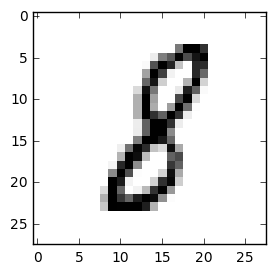

In [14]:
img = random.choice(X)

def plot_sample(array,title = ""):
    plt.figure(figsize=(3, 3))
    plt.title(title)
    plt.imshow(array.reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

plot_sample(img)

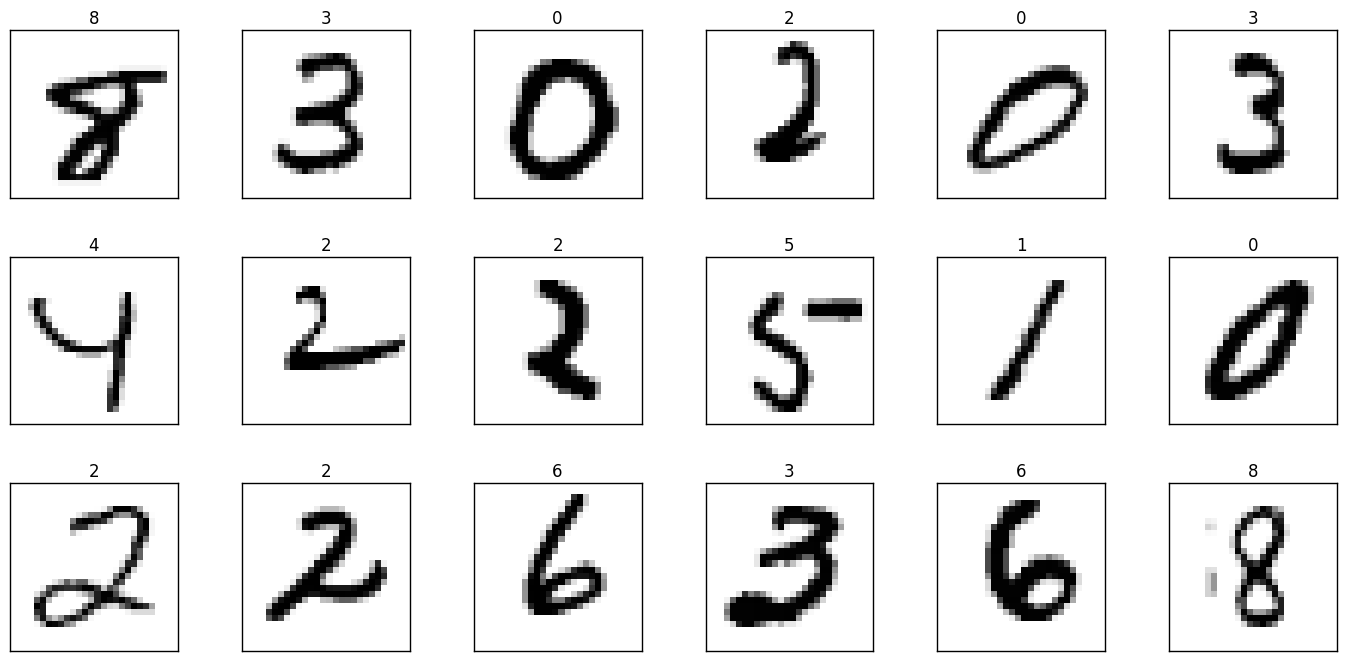

In [24]:
selection = np.random.randint(0,len(X),18)

def plot_gallery(images, titles,n_row=3, n_col=6):
    #Helper function to plot a gallery of portraits
    plt.figure(figsize=(2.3 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((28,28)),cmap=plt.cm.gray_r,interpolation="nearest")
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
        
plot_gallery(X[selection],titles[selection])

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.3)

print(X_train.shape)
print(X_test.shape)

(38500, 784)
(16500, 784)


##### Some libraries like scikit learn need not to have one hot vectors

In [30]:
t_train = np.array([list(x).index(1) for x in y_train])
t_test = np.array([list(x).index(1) for x in y_test])

***
# Simple logistic regression

## With Sklearn

### Training

In [25]:
from sklearn.linear_model import LogisticRegression

In [34]:
%%time
LR = LogisticRegression(n_jobs = 4,verbose = 1)
LR.fit(X_train,t_train)

[LibLinear]Wall time: 56.5 s


### Performances

In [37]:
prediction = LR.predict(X_test)

We can reach a **low accuracy of 92.2%** with a Logistic Regression from Sklearn

In [38]:
accuracy_score(t_test,prediction)

0.92212121212121212

## With Keras
![logo_keras](https://upload.wikimedia.org/wikipedia/commons/c/c9/Keras_Logo.jpg)

### Instantiate the model

In [40]:
model = Sequential()
model.add(Dense(10,input_dim = 784))
model.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

### Training

In [49]:
%%time
model.fit(X_train,y_train,validation_split=0.1)

Train on 34650 samples, validate on 3850 samples
Epoch 1/10
34650/34650 [==============================] - 1s - loss: 0.2612 - acc: 0.9288 - val_loss: 0.2403 - val_acc: 0.9296
Epoch 2/10
34650/34650 [==============================] - 1s - loss: 0.2592 - acc: 0.9295 - val_loss: 0.2774 - val_acc: 0.9153
Epoch 3/10
34650/34650 [==============================] - 1s - loss: 0.2564 - acc: 0.9300 - val_loss: 0.2444 - val_acc: 0.9358
Epoch 4/10
34650/34650 [==============================] - 1s - loss: 0.2575 - acc: 0.9272 - val_loss: 0.2805 - val_acc: 0.9278
Epoch 5/10
34650/34650 [==============================] - 1s - loss: 0.2528 - acc: 0.9305 - val_loss: 0.2949 - val_acc: 0.9114
Epoch 6/10
34650/34650 [==============================] - 1s - loss: 0.2512 - acc: 0.9308 - val_loss: 0.2662 - val_acc: 0.9325
Epoch 7/10
34650/34650 [==============================] - 1s - loss: 0.2510 - acc: 0.9314 - val_loss: 0.2819 - val_acc: 0.9223
Epoch 8/10
34650/34650 [==============================] - 1s -

### Performances

In [50]:
prediction = model.predict_classes(X_test)

16160/16500 [============================>.] - ETA: 0s

The **accuracy is not better** than sklearn's but it is **way faster**

In [51]:
accuracy_score(t_test,prediction)

0.92133333333333334

## With Tensorflow
![logo_tf](https://www.tensorflow.org/_static/images/tensorflow/logo.png)

### Instantiating the model
This part is almost a copy-paste of the official tutorial at https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners <br>
Yet, it has many more information, it is nice to have a look at that

#### Implementing the regression : forward pass

##### Define the placeholders for the Input variables, weights and bias

In [55]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

##### Define the forward pass : WX+b followed by a softmax function
![forward](https://www.tensorflow.org/versions/r0.10/images/softmax-regression-vectorequation.png)

In [60]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

#### Training : Implementing the backward pass

##### Define the loss function as categorical crossentropy

In [61]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

##### Prepare the backpropagation algorithm through Gradient Descent to minimize the cross entropy

In [62]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Training and prediction in a session

In [67]:
# Initialize all tensorflow variables
init = tf.global_variables_initializer()

# Number of episodes
n_episodes = 1000

# Launch session
with tf.Session() as sess:
    sess.run(init)
    
    # Run the train step 1000 times
    for i in range(n_episodes):
        print("\r[{}/{}] train step".format(i+1,n_episodes),end = "")
        
        # Taking a random batch of 100 samples 
        selection = np.random.randint(0,len(X_train),100) 
        
        # Run the step
        sess.run(train_step, feed_dict={x: X_train[selection], y_: y_train[selection]})
    print("")
    
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

[1000/1000] train step
0.9168


We reach **again a ~92% accuracy** with Tensorflow

# More to come

- More libraries with PyTorch and Caffe2
- Feed Forward Neural Networks
- Convolutional Neural Networks